# Import all the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [39]:
BATCH_SIZE = 32
IMAGE_SIZE = 300
CHANNELS=3 # RGB channels
EPOCHS=30

# Importing dataset
Dataset used is Rice Leaf dataset (https://www.kaggle.com/datasets/jay7080dev/rice-plant-diseases-dataset/data)

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\Lenovo\\Downloads\\archive (9)\\rice leaf diseases dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4684 files belonging to 3 classes.


# Exploring Dataset

In [4]:
which_classes=dataset.class_names
which_classes

['Bacterialblight', 'Brownspot', 'Leafsmut']

In [5]:
len(dataset)

147

In [6]:
147*32

4704

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 300, 300, 3)
[0 1 1 2 2 1 0 0 1 1 0 2 0 2 2 1 0 0 1 1 0 2 1 0 0 0 0 0 2 2 2 2]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)

(300, 300, 3)


# Visualizing Images

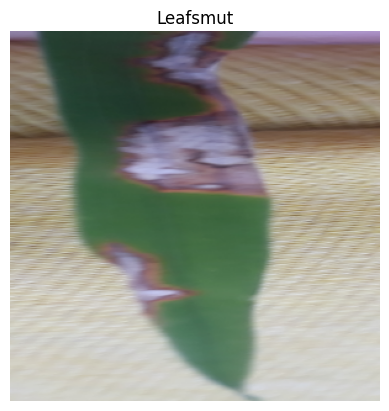

In [56]:
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(which_classes[labels_batch[i]])
    plt.axis("off")

# Spliting Dataset

In [10]:
len(dataset)

147

In [11]:
train_size=0.8
len(dataset)*train_size

117.60000000000001

In [12]:
train_ds=dataset.take(117)
len(train_ds)

117

In [13]:
test_ds=dataset.skip(54)
len(test_ds)

93

In [14]:
val_size=0.1
len(dataset)*val_size

14.700000000000001

In [15]:
val_ds=test_ds.take(14)
len(val_ds)

14

In [16]:
test_ds=test_ds.skip(14)
len(test_ds)

79

In [17]:

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [19]:
len(train_ds)

117

In [20]:
len(val_ds)

14

In [21]:
len(test_ds)

16

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

#  Image Resizing and Rescaling

In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Resizing, Rescaling


In [24]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1.0/300),
])

# Data Augmentation

In [25]:
data_augmentation=tf.keras.Sequential ([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [26]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Convolutional Neural Network (CNN) Model Architecture

In [27]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\Lenovo\anaconda3\envs\gputest\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [28]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 300, 300, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 298, 298, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 149, 149, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 147, 147, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 73, 73, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 71, 71, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 35, 35, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 33, 33, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 16, 16, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 14, 14, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 7, 7, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 5, 5, 32)              │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 32)                    │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,363 (200.64 KB)

 Trainable params: 51,363 (200.64 KB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 100s 804ms/step - accuracy: 0.4529 - loss: 0.9616 - val_accuracy: 0.7545 - val_loss: 0.6187
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 92s 782ms/step - accuracy: 0.7102 - loss: 0.6514 - val_accuracy: 0.8259 - val_loss: 0.4808
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.7702 - loss: 0.5715 - val_accuracy: 0.8125 - val_loss: 0.4887
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 110s 935ms/step - accuracy: 0.8261 - loss: 0.4673 - val_accuracy: 0.8728 - val_loss: 0.3514
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 114s 967ms/step - accuracy: 0.8403 - loss: 0.4128 - val_accuracy: 0.9062 - val_loss: 0.2829
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 102s 873ms/step - accuracy: 0.8430 - loss: 0.3885 - val_accuracy: 0.8839 - val_loss: 0.2681
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 99s 846ms/step - accuracy: 0.8617 - loss: 0.3521 - val_accuracy: 0.9062 - val_loss: 0.2477
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8936 - loss: 0

In [57]:
# Checking models accuracy on test dataset
scores = model.evaluate(test_ds)
scores

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 333ms/step - accuracy: 0.9866 - loss: 0.0383


[0.03711603954434395, 0.986328125]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 117}

In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [35]:
history.history['accuracy']

[0.5671321153640747,
 0.7301288843154907,
 0.7878625392913818,
 0.8294844031333923,
 0.853383481502533,
 0.8549946546554565,
 0.8662728071212769,
 0.888292133808136,
 0.9127282500267029,
 0.9277658462524414,
 0.926423192024231,
 0.9261546730995178,
 0.9637486338615417,
 0.9723415970802307,
 0.9578410387039185,
 0.9766380190849304,
 0.9761009812355042,
 0.959452211856842,
 0.9820085763931274,
 0.9798603653907776,
 0.9830827116966248,
 0.9830827116966248,
 0.9766380190849304,
 0.9683136343955994,
 0.9959720969200134,
 0.9994629621505737,
 0.9731471538543701,
 0.9900644421577454,
 0.9973146915435791,
 0.9744898080825806]

# Visualizing Accuracy and Loss

In [36]:
 acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

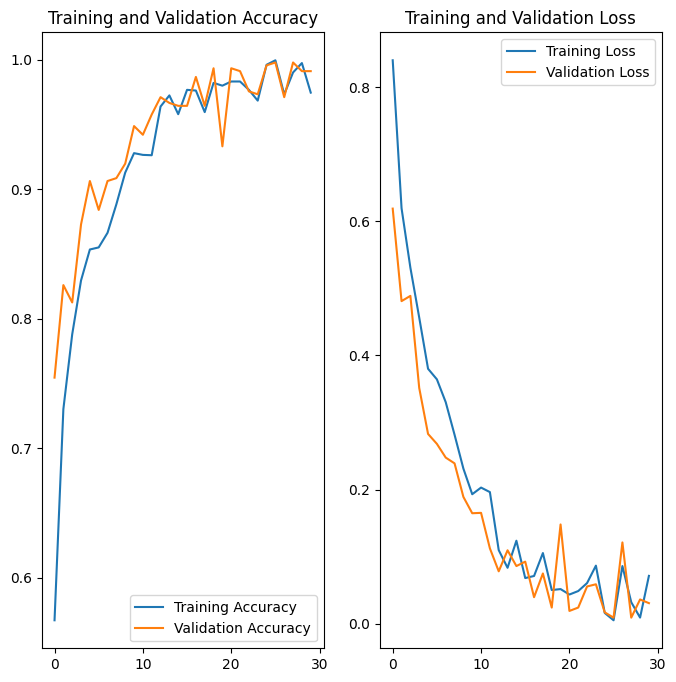

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction on dataset

first image to predict
actual label: Bacterialblight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
predicted label: Bacterialblight


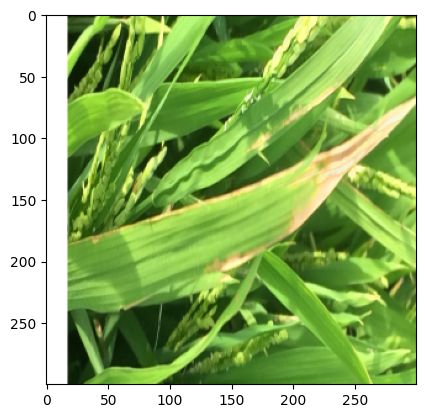

In [44]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",which_classes[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",which_classes[np.argmax(batch_prediction[0])])

In [46]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = which_classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


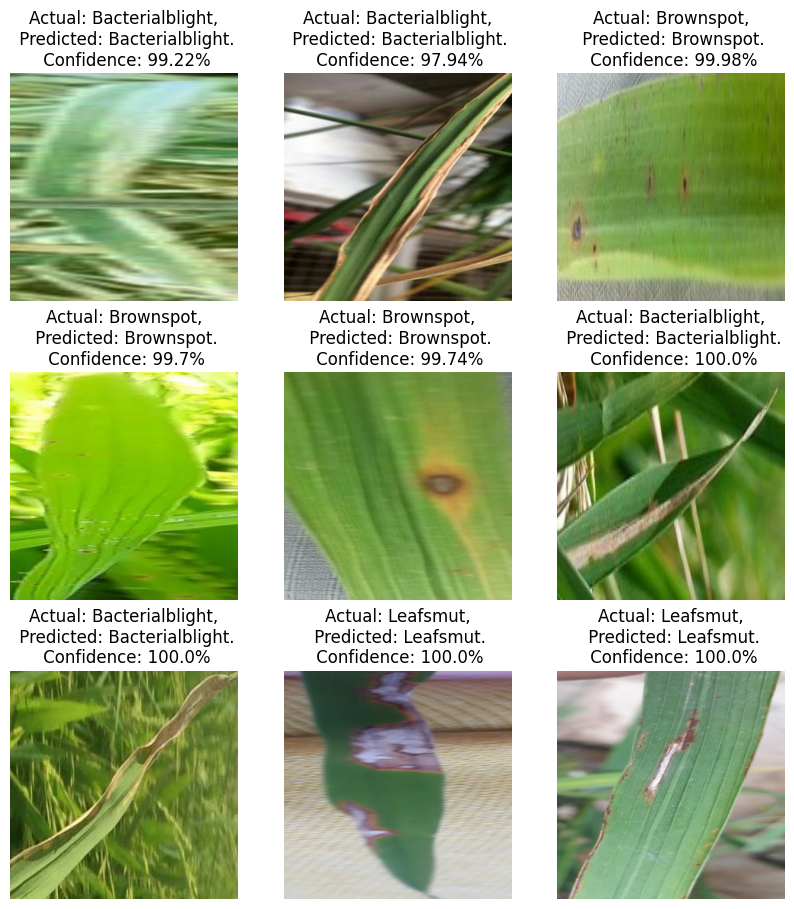

In [61]:
plt.figure(figsize=(10, 11))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = which_classes[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")